<a href="https://colab.research.google.com/github/LennyRBriones/neural-networks-practices/blob/main/brain_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

local_zip = "/tmp/brain_class.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/brain_class")
zip_ref.close()

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/tmp/brain_class/Training"
test_dir = "/tmp/brain_class/Testing"

## Data Generators

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2) #split in 20% to validate the performance

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
)


Found 5712 images belonging to 4 classes.
Found 262 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
classes = ["glioma","meningioma", "notumor", "pituitary"]

In [ ]:
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
def plotimages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize =(10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

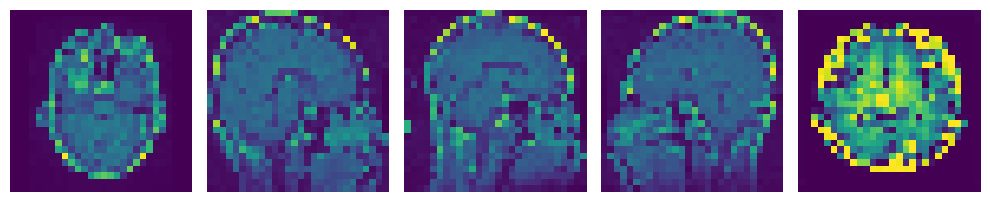

In [ ]:
sample_training_images, _ = next(train_generator)
plotimages(sample_training_images[11:16])

In [ ]:
base_model = tf.keras.models.Sequential([
                                        tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
                                        tf.keras.layers.Dense(56, activation = "relu"),
                                        tf.keras.layers.Dense(28, activation = "relu"),
                                        tf.keras.layers.Dense(len(classes), activation ="softmax")
])

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 56)                43960     
                                                                 
 dense_1 (Dense)             (None, 28)                1596      
                                                                 
 dense_2 (Dense)             (None, 4)                 116       
                                                                 
Total params: 45,672
Trainable params: 45,672
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = base_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator

)


Epoch 1/10
204/204 [==============================] - 25s 116ms/step - loss: 0.9149 - accuracy: 0.6255 - val_loss: 1.0782 - val_accuracy: 0.6336
Epoch 2/10
204/204 [==============================] - 20s 98ms/step - loss: 0.6474 - accuracy: 0.7558 - val_loss: 0.9293 - val_accuracy: 0.7176
Epoch 3/10
204/204 [==============================] - 23s 111ms/step - loss: 0.5402 - accuracy: 0.8036 - val_loss: 0.8262 - val_accuracy: 0.7481
Epoch 4/10
204/204 [==============================] - 20s 99ms/step - loss: 0.4656 - accuracy: 0.8290 - val_loss: 0.7125 - val_accuracy: 0.7481
Epoch 5/10
204/204 [==============================] - 22s 108ms/step - loss: 0.4220 - accuracy: 0.8473 - val_loss: 0.6315 - val_accuracy: 0.8168
Epoch 6/10
204/204 [==============================] - 20s 98ms/step - loss: 0.3722 - accuracy: 0.8617 - val_loss: 0.6989 - val_accuracy: 0.8015
Epoch 7/10
204/204 [==============================] - 20s 100ms/step - loss: 0.3318 - accuracy: 0.8808 - val_loss: 0.6250 - val_accur

In [ ]:
results = base_model.evaluate(test_generator)

47/47 [==============================] - 3s 73ms/step - loss: 0.3735 - accuracy: 0.8566


In [ ]:
def visualization_results(history):
  epochs = [i for i in range(10)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label ="training accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label ="validation accuracy")
  ax[0].set_title("Training & validation accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label ="training loss")
  ax[1].plot(epochs, val_loss, "ro-", label ="validation loss")
  ax[1].set_title("Training & validation loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("loss")

  plt.show()

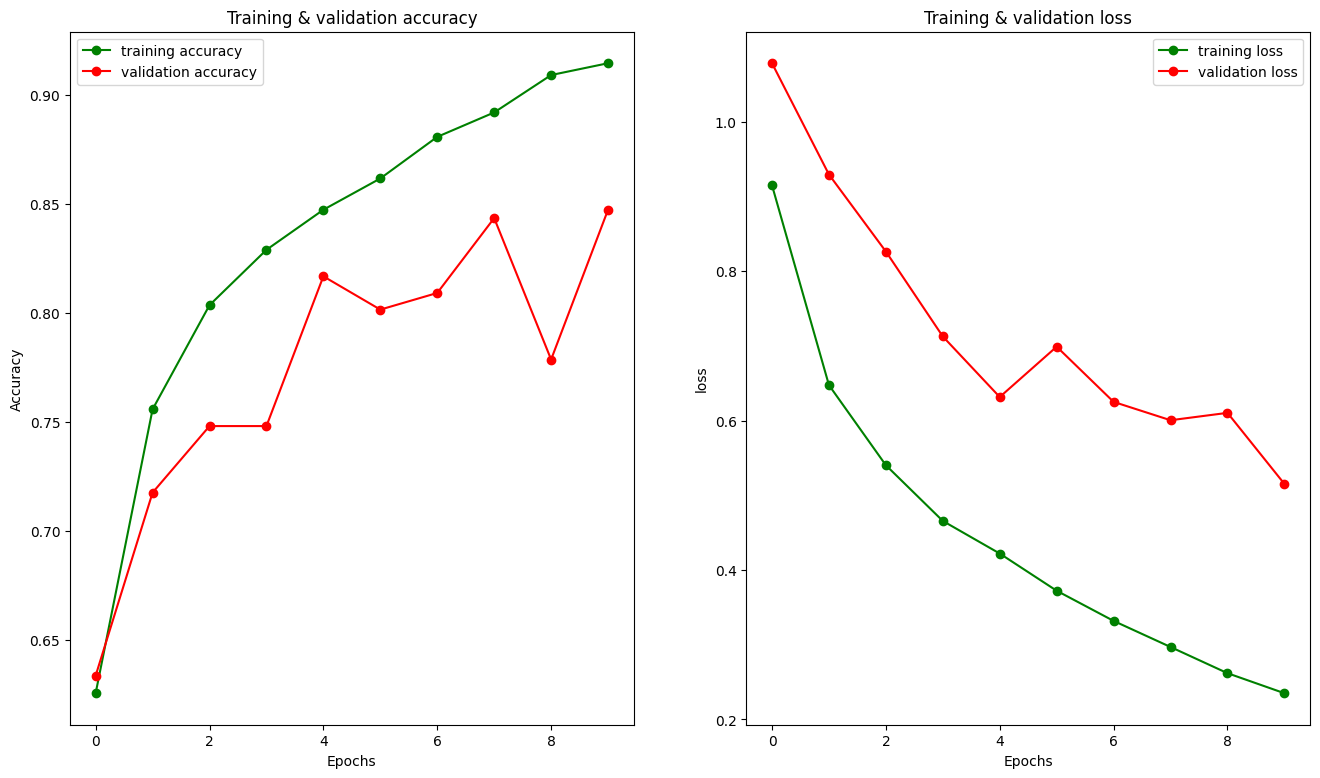

In [ ]:
visualization_results(history)

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
optimized_model = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

optimized_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 56)                43960     
                                                                 
 dropout (Dropout)           (None, 56)                0         
                                                                 
 dense_4 (Dense)             (None, 28)                1596      
                                                                 
 dropout_1 (Dropout)         (None, 28)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 116       
                                                                 
Total params: 45,672
Trainable params: 45,672
Non-trai

In [ ]:
optimized_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = optimized_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - 23s 107ms/step - loss: 1.0569 - accuracy: 0.5361 - val_loss: 1.2113 - val_accuracy: 0.5725
Epoch 2/10
204/204 [==============================] - 20s 97ms/step - loss: 0.7817 - accuracy: 0.6887 - val_loss: 0.9557 - val_accuracy: 0.6947
Epoch 3/10
204/204 [==============================] - 23s 111ms/step - loss: 0.6678 - accuracy: 0.7423 - val_loss: 0.8812 - val_accuracy: 0.7099
Epoch 4/10
204/204 [==============================] - 21s 103ms/step - loss: 0.5942 - accuracy: 0.7743 - val_loss: 0.8721 - val_accuracy: 0.7328
Epoch 5/10
204/204 [==============================] - 20s 99ms/step - loss: 0.5401 - accuracy: 0.7934 - val_loss: 0.7456 - val_accuracy: 0.7481
Epoch 6/10
204/204 [==============================] - 20s 97ms/step - loss: 0.4981 - accuracy: 0.8150 - val_loss: 0.6887 - val_accuracy: 0.7786
Epoch 7/10
204/204 [==============================] - 22s 108ms/step - loss: 0.4530 - accuracy: 0.8312 - val_loss: 0.6725 - val_accur

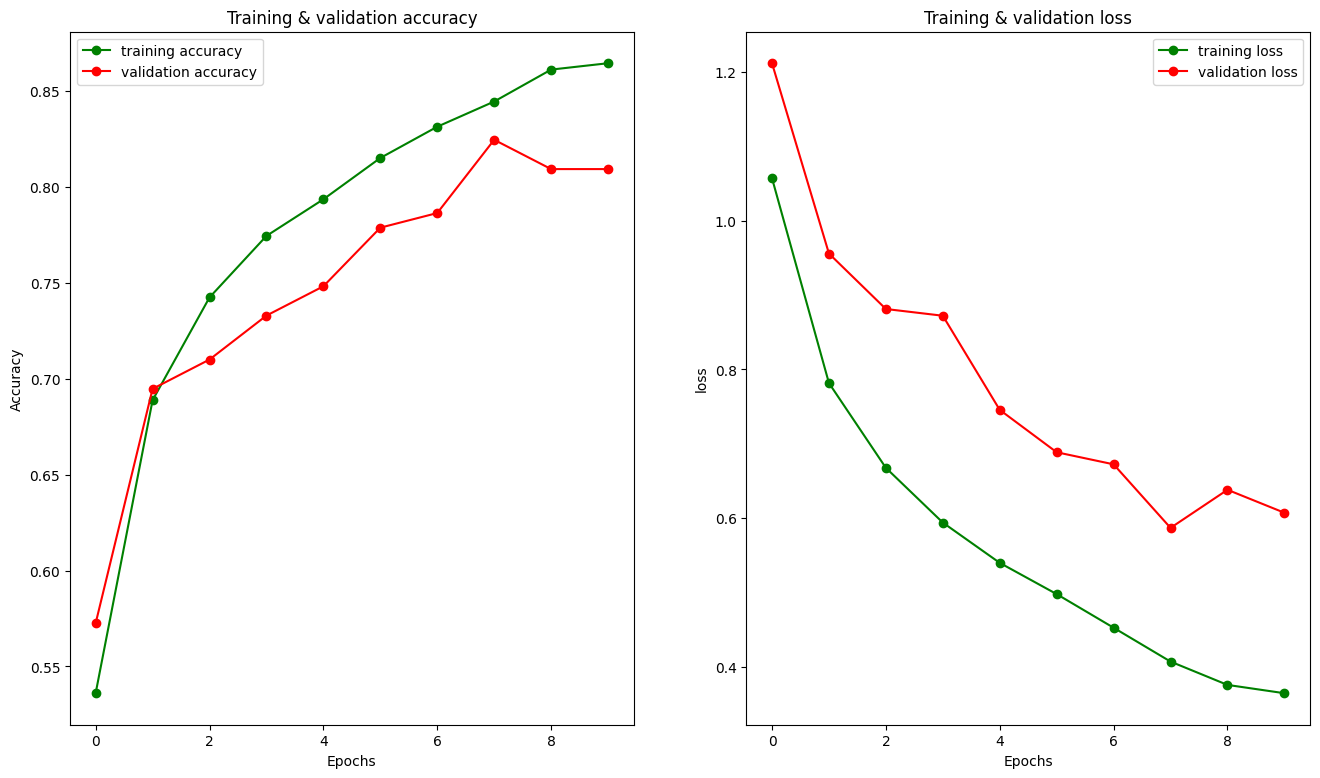

In [ ]:
visualization_results(history_optimizer)

In [ ]:
convolutional_model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(50, (3,3), activation= "relu", input_shape = (28,28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

convolutional_model.summary()

convolutional_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = convolutional_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 8450)              0         
                                                                 
 dense_6 (Dense)             (None, 56)                473256    
                                                                 
 dropout_2 (Dropout)         (None, 56)                0         
                                                                 
 dense_7 (Dense)             (None, 28)                1596      
                                                      

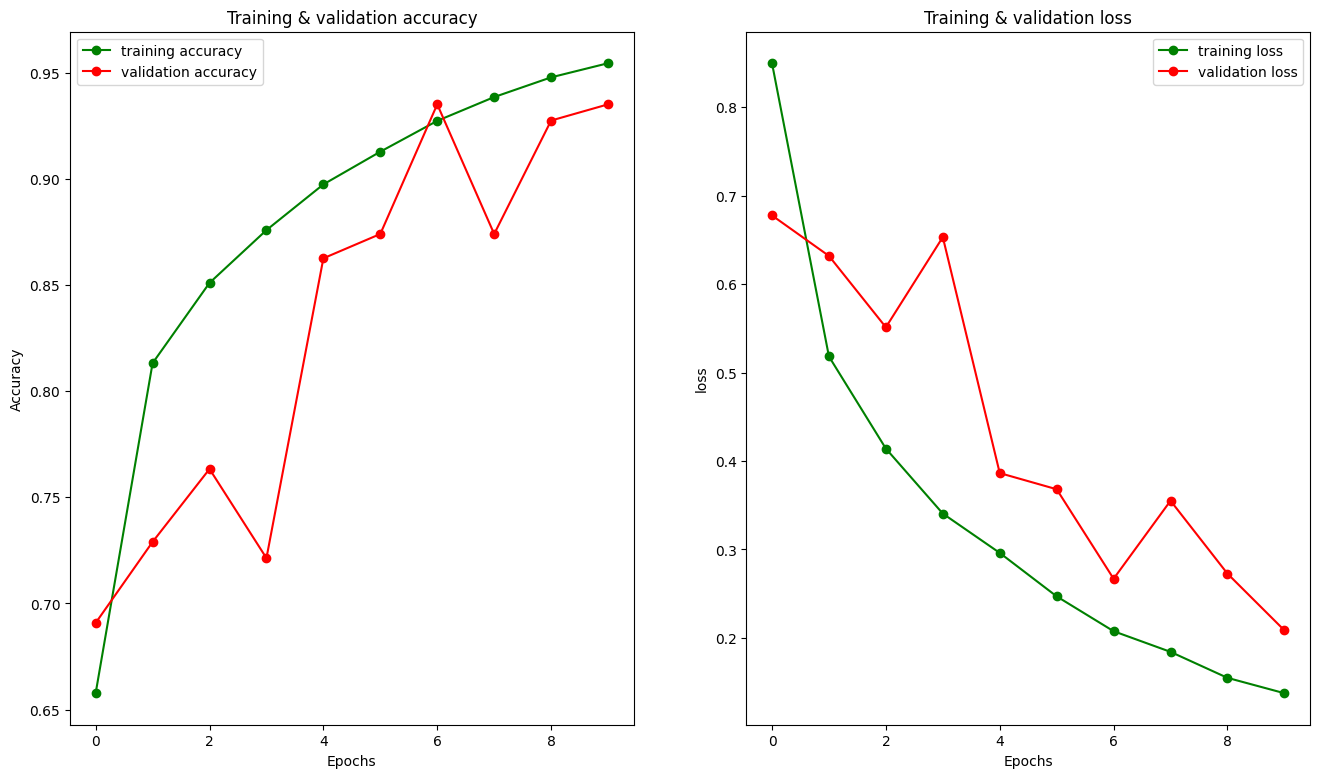

In [ ]:
visualization_results(history_convolutional)

## Using Callbacks

In [ ]:
callback_model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(50, (3,3), activation= "relu", input_shape = (28,28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

callback_model.summary()

callback_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 50)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 8450)              0         
                                                                 
 dense_9 (Dense)             (None, 56)                473256    
                                                                 
 dropout_4 (Dropout)         (None, 56)                0         
                                                                 
 dense_10 (Dense)            (None, 28)                1596      
                                                      

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Done, the model gets 95%, stopping training")
      self.model.stop_training = True

In [ ]:
callback = TrainingCallback()

history_callback = callback_model.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
204/204 [==============================] - 27s 127ms/step - loss: 0.8706 - accuracy: 0.6399 - val_loss: 0.9394 - val_accuracy: 0.6336
Epoch 2/20
204/204 [==============================] - 23s 114ms/step - loss: 0.5185 - accuracy: 0.8064 - val_loss: 0.7182 - val_accuracy: 0.7023
Epoch 3/20
204/204 [==============================] - 25s 122ms/step - loss: 0.4220 - accuracy: 0.8410 - val_loss: 0.5425 - val_accuracy: 0.7595
Epoch 4/20
204/204 [==============================] - 26s 125ms/step - loss: 0.3631 - accuracy: 0.8722 - val_loss: 0.5838 - val_accuracy: 0.7748
Epoch 5/20
204/204 [==============================] - 24s 116ms/step - loss: 0.3213 - accuracy: 0.8845 - val_loss: 0.4918 - val_accuracy: 0.7672
Epoch 6/20
204/204 [==============================] - 23s 114ms/step - loss: 0.2738 - accuracy: 0.8997 - val_loss: 0.4193 - val_accuracy: 0.8130
Epoch 7/20
204/204 [==============================] - 26s 126ms/step - loss: 0.2434 - accuracy: 0.9123 - val_loss: 0.3499 - val_ac

## Early Stopping & patience

In [ ]:
def get_model():
   model = tf.keras.models.Sequential([
             tf.keras.layers.Conv2D(25, (3,3), activation = "relu", input_shape = (28, 28,1)),
             tf.keras.layers.MaxPool2D((2,2)),
             tf.keras.layers.Flatten(),
             tf.keras.layers.Dense(56, kernel_regularizer= regularizers.l2(1e-5), activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(28, kernel_regularizer= regularizers.l2(1e-5), activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(len(classes), activation ="softmax")
   ])
   return model

model_early =  get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 25)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4225)              0         
                                                                 
 dense_12 (Dense)            (None, 56)                236656    
                                                                 
 dropout_6 (Dropout)         (None, 56)                0         
                                                                 
 dense_13 (Dense)            (None, 28)                1596      
                                                      

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 3, mode = "auto") #it could be min or max depends of the metric


In [ ]:
history_early = model_early.fit(
    train_generator,
    epochs = 10,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - 26s 120ms/step - loss: 0.8844 - accuracy: 0.6273 - val_loss: 0.8410 - val_accuracy: 0.6870
Epoch 2/10
204/204 [==============================] - 24s 117ms/step - loss: 0.5709 - accuracy: 0.7834 - val_loss: 0.7750 - val_accuracy: 0.6603
Epoch 3/10
204/204 [==============================] - 23s 115ms/step - loss: 0.4699 - accuracy: 0.8249 - val_loss: 0.6235 - val_accuracy: 0.7023
Epoch 4/10
204/204 [==============================] - 22s 106ms/step - loss: 0.4097 - accuracy: 0.8473 - val_loss: 0.5250 - val_accuracy: 0.7672
Epoch 5/10
204/204 [==============================] - 24s 117ms/step - loss: 0.3516 - accuracy: 0.8732 - val_loss: 0.4522 - val_accuracy: 0.8282
Epoch 6/10
204/204 [==============================] - 22s 109ms/step - loss: 0.3139 - accuracy: 0.8789 - val_loss: 0.4919 - val_accuracy: 0.7977
Epoch 7/10
204/204 [==============================] - 22s 109ms/step - loss: 0.2786 - accuracy: 0.9051 - val_loss: 0.4883 - val_ac

## kerasTuner

In [ ]:
! pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
def model_constructor(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(25, (3,3), activation ="relu", input_shape = (28,28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  #Dynamic generator of neurons
  hp_units = hp.Int("units", min_value = 4, max_value = 52, step = 4)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu", kernel_regularizer = regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(28, activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax" ))

  hp_learning_rate = hp.Choice("learning_rate", values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate= hp_learning_rate), loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [ ]:
tuner = kt.Hyperband(
    model_constructor,
    objective = "val_accuracy", #to see generalization in new data
    max_epochs=10,
    factor = 3,
    directory = "models/",
    project_name = "brain-tunner"
)

In [ ]:
tuner.search(train_generator, epochs = 10, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
                                          #trials help us to re-test the result

Trial 30 Complete [00h 05m 01s]
val_accuracy: 0.8702290058135986

Best val_accuracy So Far: 0.9312977194786072
Total elapsed time: 01h 12m 18s


In [ ]:
print(best_hps.get("units")) #to get the best configuration of neurons

52


In [ ]:
print(best_hps.get("learning_rate")) #to get the best configuration of learning rate

0.01


## Creating a Model with the best values

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 10,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - 25s 116ms/step - loss: 0.7741 - accuracy: 0.6754 - val_loss: 0.9694 - val_accuracy: 0.6298
Epoch 2/10
204/204 [==============================] - 24s 118ms/step - loss: 0.4834 - accuracy: 0.8206 - val_loss: 0.6638 - val_accuracy: 0.6985
Epoch 3/10
204/204 [==============================] - 22s 109ms/step - loss: 0.4013 - accuracy: 0.8494 - val_loss: 0.5970 - val_accuracy: 0.7176
Epoch 4/10
204/204 [==============================] - 24s 117ms/step - loss: 0.3392 - accuracy: 0.8797 - val_loss: 0.4154 - val_accuracy: 0.8053
Epoch 5/10
204/204 [==============================] - 24s 118ms/step - loss: 0.3188 - accuracy: 0.8908 - val_loss: 0.4639 - val_accuracy: 0.7672
Epoch 6/10
204/204 [==============================] - 22s 108ms/step - loss: 0.2883 - accuracy: 0.9020 - val_loss: 0.3452 - val_accuracy: 0.8779
Epoch 7/10
204/204 [==============================] - 22s 109ms/step - loss: 0.2844 - accuracy: 0.9067 - val_loss: 0.4016 - val_ac

In [ ]:
# to save the config of the model
config_dict = hypermodel.get_config()

In [ ]:
print(config_dict)

{'name': 'sequential_1', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_1_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 25, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, 

In [ ]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 25)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4225)              0         
                                                                 
 dense_3 (Dense)             (None, 52)                219752    
                                                                 
 dropout_2 (Dropout)         (None, 52)                0         
                                                                 
 dense_4 (Dense)             (None, 28)                1484      
                                                      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 25)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4225)              0         
                                                                 
 dense_6 (Dense)             (None, 56)                236656    
                                                                 
 dropout_4 (Dropout)         (None, 56)                0         
                                                                 
 dense_7 (Dense)             (None, 28)                1596      
                                                      

In [ ]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
checkpoint_path = "model_checkpoints/checkpoint"
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1 #show us information during training
)

In [ ]:
history_weigth = model_weight.fit(
    train_generator,
    epochs = 10,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - ETA: 0s - loss: 0.9631 - accuracy: 0.5797
Epoch 1: saving model to model_checkpoints/checkpoint
204/204 [==============================] - 24s 111ms/step - loss: 0.9631 - accuracy: 0.5797 - val_loss: 1.0386 - val_accuracy: 0.6603
Epoch 2/10
204/204 [==============================] - ETA: 0s - loss: 0.6089 - accuracy: 0.7677
Epoch 2: saving model to model_checkpoints/checkpoint
204/204 [==============================] - 24s 116ms/step - loss: 0.6089 - accuracy: 0.7677 - val_loss: 0.6896 - val_accuracy: 0.7137
Epoch 3/10
204/204 [==============================] - ETA: 0s - loss: 0.4872 - accuracy: 0.8190
Epoch 3: saving model to model_checkpoints/checkpoint
204/204 [==============================] - 24s 118ms/step - loss: 0.4872 - accuracy: 0.8190 - val_loss: 0.6276 - val_accuracy: 0.7137
Epoch 4/10
204/204 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.8412
Epoch 4: saving model to model_checkpoints/checkpoin

Manual mode

In [ ]:
model_weight.save_weights("model_manual/my_model")
#here we are manualing saving the last epoch

In [ ]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_weights2.load_weights(checkpoint_path)

In [ ]:
model_weights2.evaluate(test_generator)

47/47 [==============================] - 4s 75ms/step - loss: 0.2956 - accuracy: 0.8856


[0.29563838243484497, 0.8855835199356079]

In [ ]:
model_weight.evaluate(test_generator)

47/47 [==============================] - 5s 107ms/step - loss: 0.2956 - accuracy: 0.8856


[0.2956382930278778, 0.8855835199356079]

Comparing, we can see that we have the same accuracy, in the case of weight 2 it isn´t necesary to train again, we load the weights and it works

## Saving model & weights

In [ ]:
checkpoint_path = "model_checkpoints_complete" #this because we want to save all
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = False, #this because we want to save model and wights
    monitor = "val_accuracy", #to save only the best model
    save_best_only = True,
    verbose = 1 #show us information during training
)

In [ ]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 10,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - ETA: 0s - loss: 0.9279 - accuracy: 0.6108
Epoch 1: val_accuracy improved from -inf to 0.66794, saving model to model_checkpoints_complete


204/204 [==============================] - 27s 127ms/step - loss: 0.9279 - accuracy: 0.6108 - val_loss: 0.9284 - val_accuracy: 0.6679
Epoch 2/10
204/204 [==============================] - ETA: 0s - loss: 0.6003 - accuracy: 0.7689
Epoch 2: val_accuracy did not improve from 0.66794
204/204 [==============================] - 24s 119ms/step - loss: 0.6003 - accuracy: 0.7689 - val_loss: 0.8341 - val_accuracy: 0.6412
Epoch 3/10
204/204 [==============================] - ETA: 0s - loss: 0.4973 - accuracy: 0.8169
Epoch 3: val_accuracy improved from 0.66794 to 0.71374, saving model to model_checkpoints_complete


204/204 [==============================] - 25s 121ms/step - loss: 0.4973 - accuracy: 0.8169 - val_loss: 0.6372 - val_accuracy: 0.7137
Epoch 4/10
204/204 [==============================] - ETA: 0s - loss: 0.4359 - accuracy: 0.8360
Epoch 4: val_accuracy improved from 0.71374 to 0.77099, saving model to model_checkpoints_complete


204/204 [==============================] - 25s 120ms/step - loss: 0.4359 - accuracy: 0.8360 - val_loss: 0.5638 - val_accuracy: 0.7710
Epoch 5/10
204/204 [==============================] - ETA: 0s - loss: 0.3849 - accuracy: 0.8570
Epoch 5: val_accuracy improved from 0.77099 to 0.80534, saving model to model_checkpoints_complete


204/204 [==============================] - 25s 122ms/step - loss: 0.3849 - accuracy: 0.8570 - val_loss: 0.5005 - val_accuracy: 0.8053
Epoch 6/10
204/204 [==============================] - ETA: 0s - loss: 0.3487 - accuracy: 0.8724
Epoch 6: val_accuracy improved from 0.80534 to 0.82824, saving model to model_checkpoints_complete


204/204 [==============================] - 26s 125ms/step - loss: 0.3487 - accuracy: 0.8724 - val_loss: 0.4376 - val_accuracy: 0.8282
Epoch 7/10
204/204 [==============================] - ETA: 0s - loss: 0.3047 - accuracy: 0.8878
Epoch 7: val_accuracy did not improve from 0.82824
204/204 [==============================] - 24s 120ms/step - loss: 0.3047 - accuracy: 0.8878 - val_loss: 0.4713 - val_accuracy: 0.7977
Epoch 8/10
204/204 [==============================] - ETA: 0s - loss: 0.2735 - accuracy: 0.8997
Epoch 8: val_accuracy improved from 0.82824 to 0.84351, saving model to model_checkpoints_complete


204/204 [==============================] - 26s 125ms/step - loss: 0.2735 - accuracy: 0.8997 - val_loss: 0.3736 - val_accuracy: 0.8435
Epoch 9/10
204/204 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.9104
Epoch 9: val_accuracy improved from 0.84351 to 0.86260, saving model to model_checkpoints_complete


204/204 [==============================] - 25s 125ms/step - loss: 0.2452 - accuracy: 0.9104 - val_loss: 0.4135 - val_accuracy: 0.8626
Epoch 10/10
204/204 [==============================] - ETA: 0s - loss: 0.2238 - accuracy: 0.9191
Epoch 10: val_accuracy did not improve from 0.86260
204/204 [==============================] - 24s 116ms/step - loss: 0.2238 - accuracy: 0.9191 - val_loss: 0.4280 - val_accuracy: 0.8550


Now we have the model complete saved only the best values, the next step is save the information, there is a tip to save everything in a zip

In [ ]:
!zip model_checkpoints_complete *

  adding: drive/ (stored 0%)
  adding: model_checkpoints/ (stored 0%)
  adding: model_checkpoints_complete/ (stored 0%)
  adding: model_manual/ (stored 0%)
  adding: models/ (stored 0%)
  adding: sample_data/ (stored 0%)


also there is a way to save it manualy

In [ ]:
model_complete.save("save_model_complete/mymodel")

In [ ]:
model_completenew = tf.keras.models.load_model("save_model_complete/mymodel") 

In [ ]:
model_completenew.evaluate(test_generator)

47/47 [==============================] - 5s 95ms/step - loss: 0.3307 - accuracy: 0.8757


[0.3307391107082367, 0.8756674528121948]

In [ ]:
model_complete.evaluate(test_generator)

47/47 [==============================] - 7s 145ms/step - loss: 0.3307 - accuracy: 0.8757


[0.3307390511035919, 0.8756674528121948]

As we can see, the model have the same values, that means that we only load the data of the model getting the necesary withput training

## Format h5py, to load models easy

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model_completenew.save("my_model.h5")

In [ ]:
model_completenew2 = tf.keras.models.load_model("my_model.h5")

In [ ]:
model_completenew2.evaluate(test_generator)

47/47 [==============================] - 11s 211ms/step - loss: 0.3307 - accuracy: 0.8757


[0.33073902130126953, 0.8756674528121948]

## Transfer Learning

Every time that we need transferlearning it´ll be necessary to resize the information 

In [ ]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150), #depends of the model that we are transfer, never oversize
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "rgb", # also the rgb or grayscale
    subset = "training"
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
)

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "rgb",
)

Found 5712 images belonging to 4 classes.
Found 262 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    include_top = False, #not using the top when is transfer
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3)) #size and color

)

for layer in pre_trained_model.layers:
  layer.trainable = False #NOT necessary to traine, is transfer learning

pre_trained_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_5[0][0]']               
 alization)                                                                                       
                      

Selecting the last layer to add our model after the pre trained model

In [ ]:
last_layers = pre_trained_model.get_layer("mixed7")
last_output = last_layers.output

In [ ]:
# Add out model at the end of the layers
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(28, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(classes), activation = "softmax")(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_keras.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_5[0][0]']               
 alization)                                                                                       
                                                                                            

In [ ]:
history_keras = model_keras.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
204/204 [==============================] - 294s 1s/step - loss: 0.5177 - accuracy: 0.8013 - val_loss: 0.2994 - val_accuracy: 0.9084
Epoch 2/5
204/204 [==============================] - 268s 1s/step - loss: 0.2374 - accuracy: 0.8983 - val_loss: 0.1736 - val_accuracy: 0.9313
Epoch 3/5
204/204 [==============================] - 277s 1s/step - loss: 0.1729 - accuracy: 0.9249 - val_loss: 0.1478 - val_accuracy: 0.9313
Epoch 4/5
204/204 [==============================] - 269s 1s/step - loss: 0.1523 - accuracy: 0.9317 - val_loss: 0.1349 - val_accuracy: 0.9656
Epoch 5/5
204/204 [==============================] - 275s 1s/step - loss: 0.1285 - accuracy: 0.9422 - val_loss: 0.0762 - val_accuracy: 0.9695


In [ ]:
results = model_keras.evaluate(test_generator_resize)

47/47 [==============================] - 59s 1s/step - loss: 0.1114 - accuracy: 0.9580


## Using a model from Tensorflow Hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
!pip install --upgrade tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

model_hub = tf.keras.Sequential([
                                 tf.keras.layers.InputLayer(input_shape = (150, 150, 3)),
                                 hub.KerasLayer(module_url, trainable = False),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(28, activation = "relu"),
                                 tf.keras.layers.Dropout(rate=0.2),
                                 tf.keras.layers.Dense(len(classes), activation = "softmax")

])

model_hub.build((None, 150, 150, 3)) #here must be the size of you images
model_hub.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              1343049   
                                                                 
 flatten_8 (Flatten)         (None, 1001)              0         
                                                                 
 dense_21 (Dense)            (None, 28)                28056     
                                                                 
 dropout_13 (Dropout)        (None, 28)                0         
                                                                 
 dense_22 (Dense)            (None, 4)                 116       
                                                                 
Total params: 1,371,221
Trainable params: 28,172
Non-trainable params: 1,343,049
_________________________________________________________________


In [ ]:
model_hub.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_hub = model_hub.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
204/204 [==============================] - 77s 364ms/step - loss: 0.8059 - accuracy: 0.6828 - val_loss: 0.8090 - val_accuracy: 0.6641
Epoch 2/5
204/204 [==============================] - 66s 323ms/step - loss: 0.4859 - accuracy: 0.8134 - val_loss: 0.6768 - val_accuracy: 0.6832
Epoch 3/5
204/204 [==============================] - 67s 331ms/step - loss: 0.4429 - accuracy: 0.8283 - val_loss: 0.6161 - val_accuracy: 0.7290
Epoch 4/5
204/204 [==============================] - 65s 318ms/step - loss: 0.4138 - accuracy: 0.8351 - val_loss: 0.5641 - val_accuracy: 0.7519
Epoch 5/5
204/204 [==============================] - 68s 333ms/step - loss: 0.3845 - accuracy: 0.8487 - val_loss: 0.5535 - val_accuracy: 0.7366


In [ ]:
results = model_hub.evaluate(test_generator_resize)

47/47 [==============================] - 15s 317ms/step - loss: 0.3805 - accuracy: 0.8352


## Using Tensor Board

In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [ ]:
model_tensorboard = get_model()
model_tensorboard.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
callback_tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))

In [1]:
#history_tensorboard = model_tensorboard.fit(
#    train_generator,
#    epochs = 10,
#    callbacks = [callback_tensorboard],
#    validation_data = validation_generator
#)